In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lifelines

In [5]:
prison = pd.read_csv('datasets/rossi.csv', index_col=0)
prison.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


## Draw a survival curve
You are a sociologist studying how convicts behave after their release. The DataFrame `prison` contains the information from 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up with one year after release. There are two main columns of interest:

* `week`: the number of weeks elapsed since release
* `arrest`: whether the convict has been re-arrested within one year after release
A Kaplan Meier survival function has been fitted for you and the model object is called `prison_kmf`. Can you visualize the survival curve of `prison_kmf`?

The matplotlib.pyplot library is imported as plt and the lifelines module has also been imported for you.

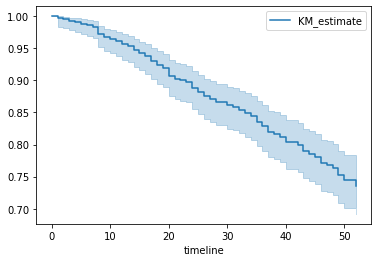

In [6]:
prison_kmf = lifelines.KaplanMeierFitter()
prison_kmf.fit(prison['week'], prison['arrest'])
prison_kmf.plot()
plt.show()